In [2]:
# Tải thư viện pandas để xử lý dữ liệu bảng
import pandas as pd

# Đọc tập dữ liệu Ames từ tệp CSV
Ames = pd.read_csv('../data/Ames.csv')

# Tính toán hệ số tương quan Pearson giữa tất cả các cột số và cột 'SalePrice'
# Sử dụng numeric_only=True để chỉ tính các cột dạng số
correlations = Ames.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)

# Lấy ra 10 đặc điểm có tương quan cao nhất với 'SalePrice' (bỏ chính nó ở vị trí đầu tiên)
top_correlations = correlations[1:11]

# In ra màn hình danh sách các đặc điểm có tương quan mạnh nhất với giá bán
print(top_correlations)

OverallQual     0.790661
GrLivArea       0.719980
TotalBsmtSF     0.652268
1stFlrSF        0.642623
GarageCars      0.639017
GarageArea      0.635029
YearBuilt       0.544569
FullBath        0.535175
GarageYrBlt     0.521105
YearRemodAdd    0.514720
Name: SalePrice, dtype: float64


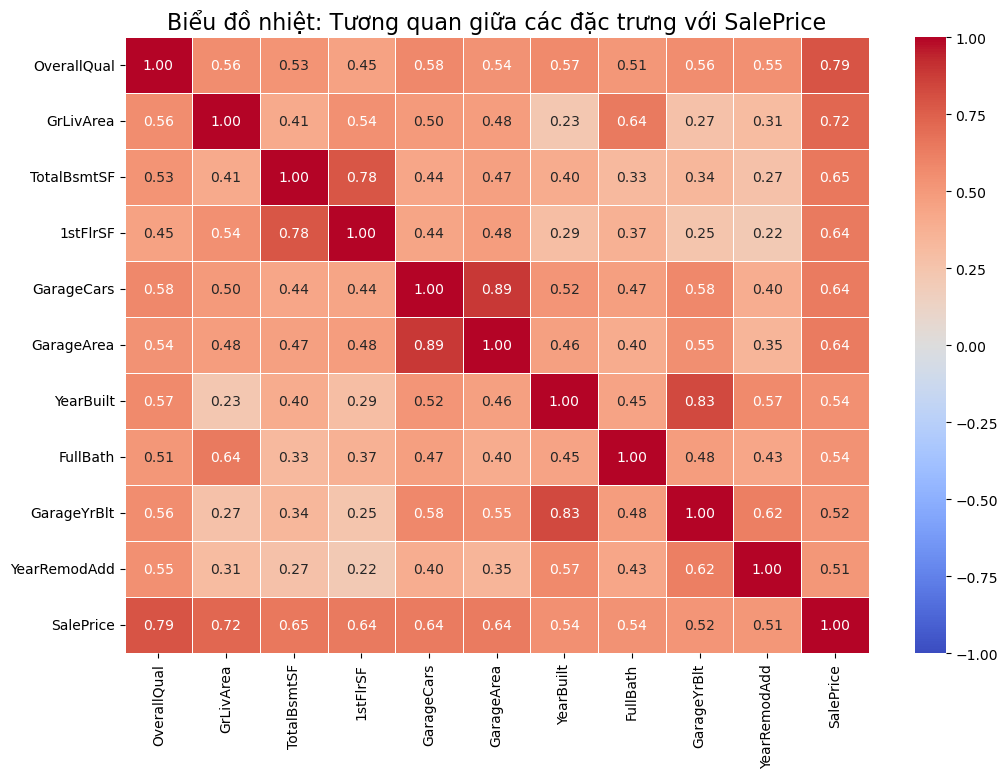

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn các đặc trưng có tương quan cao nhất, bao gồm cả SalePrice
selected_features = list(top_correlations.index) + ['SalePrice']

# Tính toán ma trận tương quan giữa các đặc trưng đã chọn
correlation_matrix = Ames[selected_features].corr()

# Thiết lập kích thước khung vẽ bằng matplotlib
plt.figure(figsize=(12, 8))

# Vẽ biểu đồ nhiệt (heatmap) thể hiện mức độ tương quan
sns.heatmap(correlation_matrix, annot=True,       # Hiển thị số liệu trên từng ô
            cmap="coolwarm",                      # Dải màu: xanh cho âm, đỏ cho dương
            linewidths=.5,                        # Độ rộng viền giữa các ô
            fmt=".2f",                            # Định dạng số: 2 chữ số sau dấu phẩy
            vmin=-1, vmax=1)                      # Giới hạn giá trị từ -1 đến 1

# Đặt tiêu đề cho biểu đồ
plt.title("Biểu đồ nhiệt: Tương quan giữa các đặc trưng với SalePrice", fontsize=16)

# Hiển thị biểu đồ
plt.show()

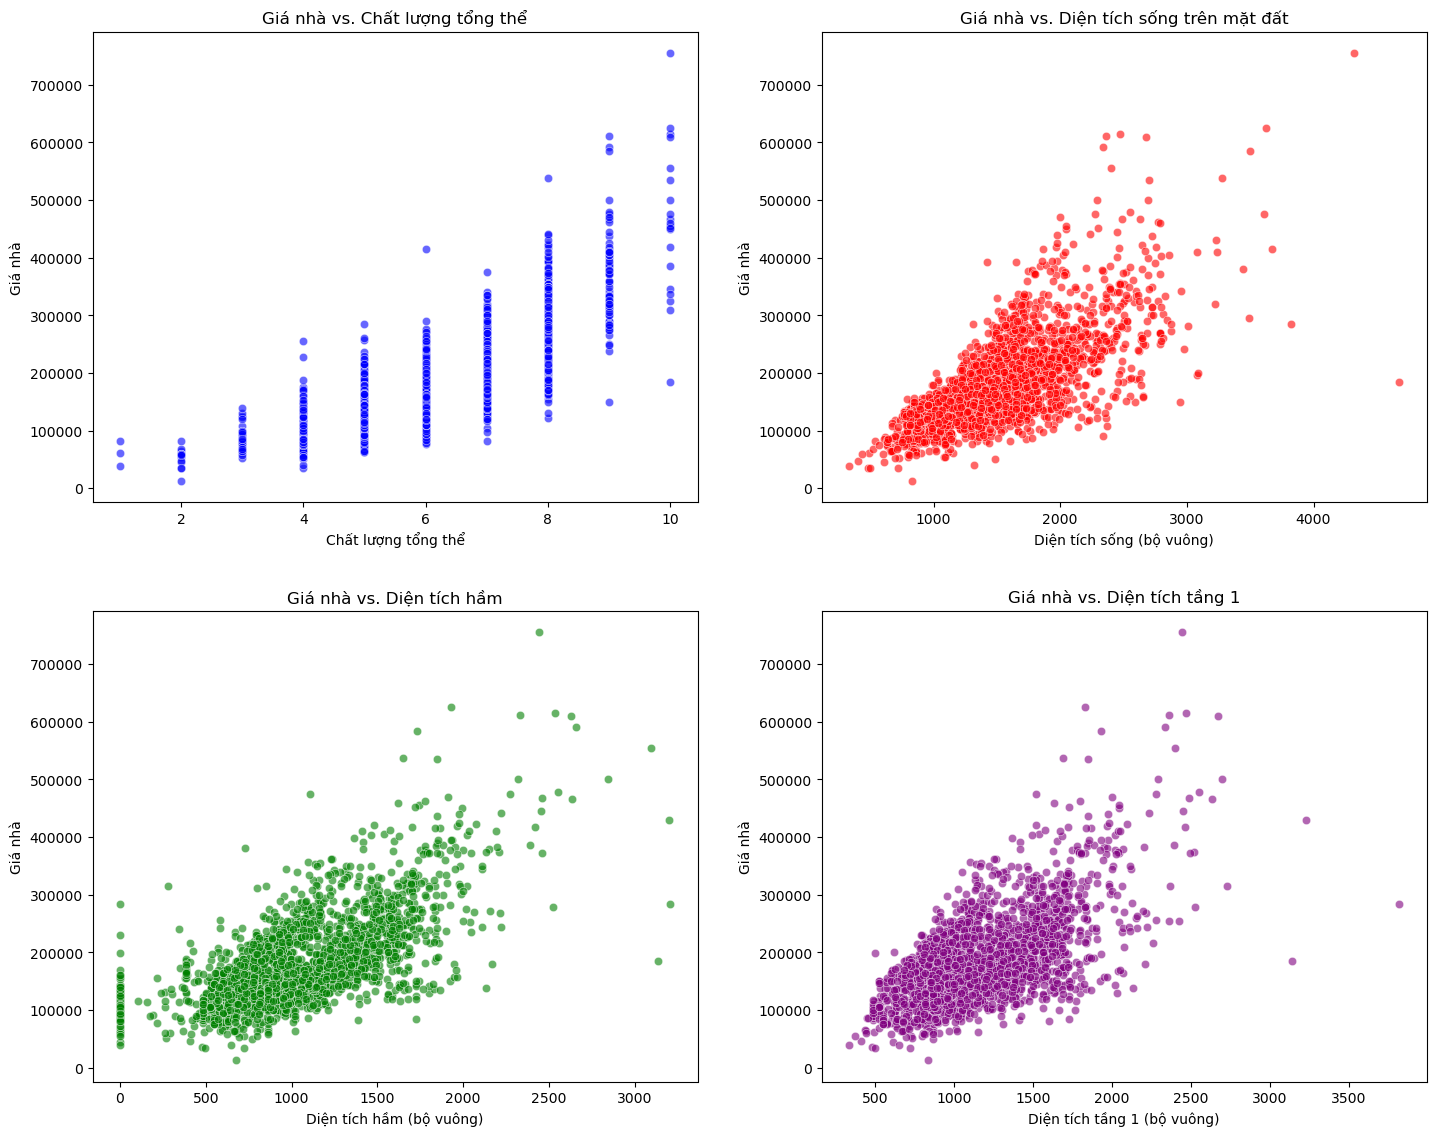

In [5]:
# Thiết lập khung hình và trục (2 hàng x 2 cột), kích thước 15x12 inch
fig, ax = plt.subplots(2, 2, figsize=(15, 12))

# Biểu đồ phân tán giữa Giá bán và Chất lượng tổng thể
sns.scatterplot(x=Ames['OverallQual'], y=Ames['SalePrice'], ax=ax[0, 0],
                color='blue', alpha=0.6)
ax[0, 0].set_title('Giá nhà vs. Chất lượng tổng thể')
ax[0, 0].set_ylabel('Giá nhà')
ax[0, 0].set_xlabel('Chất lượng tổng thể')

# Biểu đồ phân tán giữa Giá bán và Diện tích sống trên mặt đất
sns.scatterplot(x=Ames['GrLivArea'], y=Ames['SalePrice'], ax=ax[0, 1],
                color='red', alpha=0.6)
ax[0, 1].set_title('Giá nhà vs. Diện tích sống trên mặt đất')
ax[0, 1].set_ylabel('Giá nhà')
ax[0, 1].set_xlabel('Diện tích sống (bộ vuông)')

# Biểu đồ phân tán giữa Giá bán và Tổng diện tích hầm
sns.scatterplot(x=Ames['TotalBsmtSF'], y=Ames['SalePrice'], ax=ax[1, 0],
                color='green', alpha=0.6)
ax[1, 0].set_title('Giá nhà vs. Diện tích hầm')
ax[1, 0].set_ylabel('Giá nhà')
ax[1, 0].set_xlabel('Diện tích hầm (bộ vuông)')

# Biểu đồ phân tán giữa Giá bán và Diện tích tầng 1
sns.scatterplot(x=Ames['1stFlrSF'], y=Ames['SalePrice'], ax=ax[1, 1],
                color='purple', alpha=0.6)
ax[1, 1].set_title('Giá nhà vs. Diện tích tầng 1')
ax[1, 1].set_ylabel('Giá nhà')
ax[1, 1].set_xlabel('Diện tích tầng 1 (bộ vuông)')

# Điều chỉnh bố cục giữa các biểu đồ để không bị chồng lấn
plt.tight_layout(pad=3.0)

# Hiển thị tất cả biểu đồ
plt.show()

In [6]:
from scipy.stats import pearsonr
r, p_value = pearsonr(Ames['GrLivArea'], Ames['SalePrice'])
print(f"Hệ số r = {r:.2f}, p-value = {p_value:.4f}")

Hệ số r = 0.72, p-value = 0.0000


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


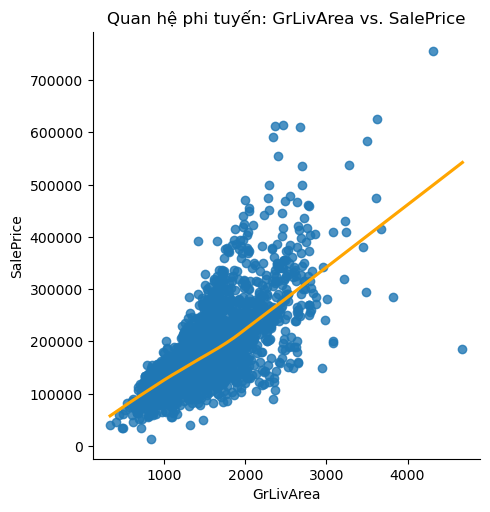

In [7]:
sns.lmplot(data=Ames, x='GrLivArea', y='SalePrice', lowess=True, line_kws={'color': 'orange'})
plt.title('Quan hệ phi tuyến: GrLivArea vs. SalePrice')
plt.show()

## Kết thúc